In [143]:
from matplotlib import pyplot as plt
from sklearn import linear_model
#plt.style.use('classic')
from matplotlib import style
style.use('seaborn-whitegrid')
import pandas as pd 
import numpy as np

In [144]:
data = pd.read_csv('D:/STUDY/4.GIS/G I S 4.2/0.Project/ModelsAlgorithmsCodes/6.Accurcay Assesment/Chl-a/Correlation2020.csv', index_col = 0)
data.shape
data.dropna(inplace = True)
data.head(3)

,X,Y,S3 OLCI Chl-a (Reference),L8 Chl-a Estimates
Date,,,,
1,34.77656,-0.274973,29.615417,31.186287
2,34.68830,-0.136000,19.873812,22.987190
3,34.84310,-0.287050,22.811043,31.673557


In [145]:
# Correlation Co-efficient
data.corr()

,X,Y,S3 OLCI Chl-a (Reference),L8 Chl-a Estimates
X,1.000000,0.096468,0.012696,-0.016233
Y,0.096468,1.000000,0.036517,-0.014687
S3 OLCI Chl-a (Reference),0.012696,0.036517,1.000000,0.882167
L8 Chl-a Estimates,-0.016233,-0.014687,0.882167,1.000000


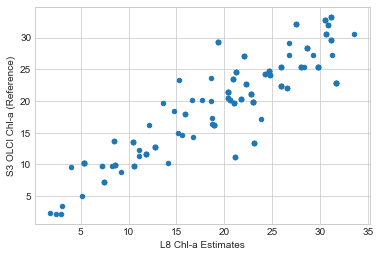

In [146]:
data.plot(kind='scatter', x = "L8 Chl-a Estimates", y="S3 OLCI Chl-a (Reference)")
plt.show()

In [147]:

# change to df
estimates = pd.DataFrame(data["S3 OLCI Chl-a (Reference)"])
reference = pd.DataFrame(data["L8 Chl-a Estimates"])

In [148]:
#Build linear model
lm = linear_model.LinearRegression()
model = lm.fit(estimates, reference)

In [149]:
model.coef_

array([[0.94630015]])

In [150]:
model.intercept_

array([1.29034905])

In [151]:
# Model Evaluation
model.score(estimates, reference)

0.7782189750691326

In [152]:
# Predict new value of price
estimatesNew = 56
estimatesNew = np.array(estimatesNew).reshape(1, -1)
estimatesPred = model.predict(estimatesNew)
estimatesPred

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[54.28315742]])

In [153]:
# Predict more values
X = ([672676, 582682])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis = 1, keys = ['estimatesNew', 'estimatesPred'])
df

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,estimatesNew,estimatesPred
,0,0
0,672676,636554.689684
1,582682,551393.354034


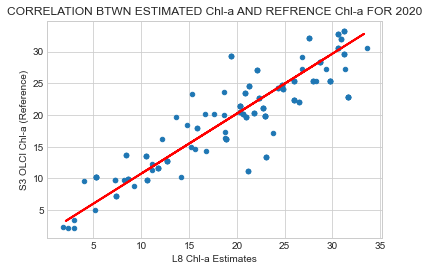

In [154]:
# Visualize the results

#data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a (Reference)")
data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a (Reference)")
# Regression line
plt.plot(estimates, model.predict(estimates), color = "red", linewidth = 2)
#plt.legend(loc='best',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("CORRELATION BTWN ESTIMATED Chl-a AND REFRENCE Chl-a FOR 2020")
plt.show()